In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
df = pd.read_csv('Datasets/Height_Weight_Data.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


When using linear regression, it is always a good idea to plot the correlation.

In [23]:
#check correlation
df.corr()
#high correlation between height and weight

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


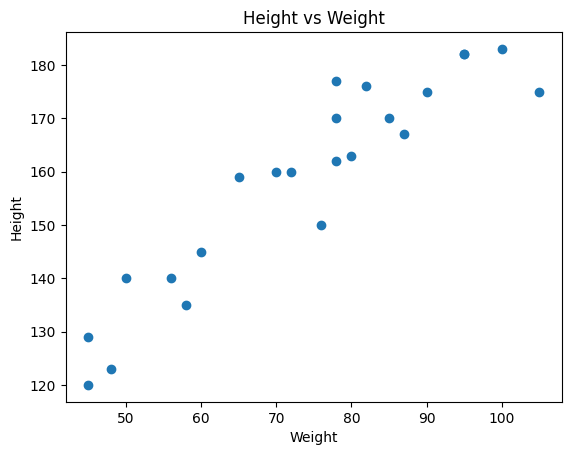

In [24]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

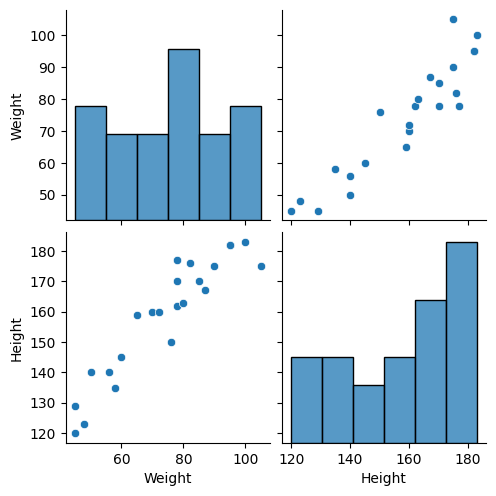

In [25]:
import seaborn as sns
sns.pairplot(df)

When there is high correlation, then it means we can use linear regression!

In [26]:
# X = df['Weight']
# print(type(X)) #<class 'pandas.core.series.Series'>
X = df[['Weight']] #independent variable should be a dataframe or 2D array
y = df['Height'] #dependent variable should be a series or 1D array
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
#standardization of units only for the independent variable since optimization is done on the independent variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#we want to transform the test set using the same scaler fitted on the training set

Data Leakage: Data Leakage in Machine Learning is when information from outside the training dataset is used to create the model — in a way that wouldn't be available in a real-world scenario. This leads to overly optimistic performance estimates and poor generalization to new data.

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
print(model.coef_) #slope of the line
print(model.intercept_) #y-intercept of the line

[17.2982057]
156.47058823529412


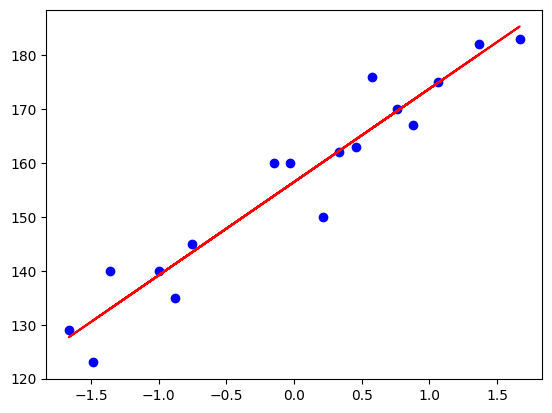

In [31]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')

In [32]:
# y_pred_test = 1.04792503 x + 80.5268451262254
# y_pred_test =  intercept + slope * x

In [33]:
#predicting on the test set
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Absolute Error: {np.sqrt(mse)}')


R^2 Score: 0.7360826717981276
Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.66512588679501
Root Mean Absolute Error: 10.716374991212605


In [35]:
#prediction for new data
new_data = np.array([[70]])  # Example weight in pounds
new_data_scaled = scaler.transform(new_data)  # Scale the new data
predicted_height = model.predict(new_data_scaled)
print(f'Predicted Height for weight 70 lbs: {predicted_height[0]} inches')

Predicted Height for weight 70 lbs: 153.8815969929395 inches


/Users/aryansai/Documents/MachineLearning/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## R-Squared and Adjusted R-Squared

In [ ]:
# Method 1: From the model
r2 = model.score(X_test, y_test)

# Method 2: Using r2_score
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

n = X_test.shape[0]     # number of observations
p = X_test.shape[1]     # number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)